# Qiskit version 2.x

## Install Minicoda

In [ ]:
pip install qiskit

In [ ]:
pip install qiskit-ibm-runtime

In [15]:
import qiskit

In [16]:
qiskit.__version__

'2.0.2'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum", # ibm_cloud 
                               token = 'YOURTOKEN')


In [ ]:
QiskitRuntimeService.save_account(channel='ibm_quantum',
                                  token = 'YOURTOKEN')


In [17]:
backend = service.backend(name = "ibm_brisbane")

In [18]:
backend.num_qubits

127

## ๑. 🙏 สวัสดีชาวโลก บนสถานะ ๒ คิวบิต

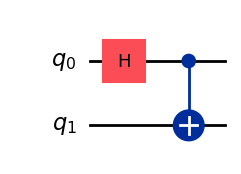

In [19]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.draw(output='mpl')

In [20]:
from qiskit.quantum_info import Pauli

ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

observables = [ZZ, ZI, IZ, XX, XI, IX]

## ๒. การเพิ่มประสิทธิภาพ

In [ ]:
pip install -U qiskit qiskit-aer

## ๓. การประมวลผลบนระบบหลังบ้าน

In [21]:
from qiskit_aer.primitives import Estimator

estimator = Estimator()

job = estimator.run([qc] * len(observables), observables)

job.result()

EstimatorResult(values=array([1.        , 0.06445312, 0.06445312, 1.        , 0.0546875 ,
       0.0546875 ]), metadata=[{'shots': 1024, 'variance': 0.0, 'simulator_metadata': [{'time_taken': 0.007301009, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000355849, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 64297, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}]}, {'shots': 1024, 'variance': 0.9958457946777344, 'simulator_metadata': [{'time_taken': 0.007301009, 'num_bind_params': 1, 'parallel_state_update': 16, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.000355

## ๔. การประมวลผลภายหลัง(การพล็อต/การสร้างกราฟ)

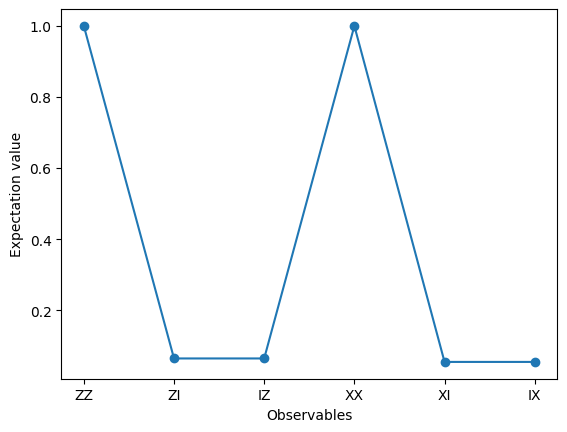

In [22]:
import matplotlib.pyplot as plt

data = ['ZZ', 'ZI', 'IZ', 'XX', 'XI', 'IX']
values = job.result().values

plt.plot(data, values, '-o')
plt.xlabel('Observables')
plt.ylabel('Expectation value')
plt.show()

# ตัวอย่างการขยาย "สวัสดี ชาวโลก" ไปสู่สถานะ GHZ แบบ $n$-qubit

## ๑.การแมปปัญหาเข้ากับวงจรและโอเปอเรเตอร์

In [ ]:
def get_qc_for_n_qubit_GHZ_state(n):
    qc = QuantumCircuit(n)
    qc.h(0)
    for i in range(n-1):
        qc.cx(i, i+1)
    return qc

n = 100
qc = get_qc_for_n_qubit_GHZ_state(n)
qc.draw(output='mpl')

In [ ]:
from qiskit.quantum_info import SparsePauliOp

operator_strings = ['Z' + 'I' * i + 'Z' + 'I' * (n-2-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_string) for operator_string in operator_strings]